# Penarikan Kesimpulan dan Pengujian Hipotesis

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
from scipy.stats import normaltest
from scipy.stats import norm
import scipy.stats as st
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest


df=pd.read_csv("anggur.csv")

# Deskripsi Statistika

### Mean, Median, Standar Deviasi, Variansi, Range, Nilai Minimum, Nilai Maksimum, Kuartil 1, Kuartil 2, Kuartil 3, IQR, Skewness, Kurtosis

In [91]:
target = df.drop(["quality"], axis=1)

deskStat = pd.DataFrame()
deskStat["Mean"] = target.mean()
deskStat["Media"] = target.median()
deskStat["Standar Deviasi"] = target.std()
deskStat["Variansi"] = target.var()
deskStat["Range"] = target.max()-target.min()
deskStat["Min"] = target.min()
deskStat["Max"] = target.max()
deskStat["Q1"] = target.quantile(0.25)
deskStat["Q2"] = target.quantile(0.50)
deskStat["Q3"] = target.quantile(0.75)
deskStat["IQR"] = target.quantile(0.75) - target.quantile(0.25)
deskStat["Skewness"] = target.skew()
deskStat["Kurtosis"] = target.kurtosis()

deskStat

,Mean,Media,Standar Deviasi,Variansi,Range,Min,Max,Q1,Q2,Q3,IQR,Skewness,Kurtosis
fixed acidity,7.152530,7.150000,1.201598,1.443837,8.170000,3.320000,11.490000,6.377500,7.150000,8.000000,1.622500,-0.028879,-0.019292
volatile acidity,0.520838,0.524850,0.095848,0.009187,0.665200,0.139900,0.805100,0.456100,0.524850,0.585375,0.129275,-0.197699,0.161853
citric acid,0.270517,0.272200,0.049098,0.002411,0.292900,0.116700,0.409600,0.237800,0.272200,0.302325,0.064525,-0.045576,-0.104679
residual sugar,2.567104,2.519430,0.987915,0.975977,5.518200,0.032555,5.550755,1.896330,2.519430,3.220873,1.324544,0.132638,-0.042980
chlorides,0.081195,0.082167,0.020111,0.000404,0.125635,0.015122,0.140758,0.066574,0.082167,0.095312,0.028738,-0.051319,-0.246508
free sulfur dioxide,14.907679,14.860346,4.888100,23.893519,27.267847,0.194679,27.462525,11.426717,14.860346,18.313098,6.886381,0.007130,-0.364964
total sulfur dioxide,40.290150,40.190000,9.965767,99.316519,66.810000,3.150000,69.960000,33.785000,40.190000,47.022500,13.237500,-0.024060,0.063950
density,0.995925,0.996000,0.002020,0.000004,0.013800,0.988800,1.002600,0.994600,0.996000,0.997200,0.002600,-0.076883,0.016366
pH,3.303610,3.300000,0.104875,0.010999,0.740000,2.970000,3.710000,3.230000,3.300000,3.370000,0.140000,0.147673,0.080910
sulphates,0.598390,0.595000,0.100819,0.010164,0.670000,0.290000,0.960000,0.530000,0.595000,0.670000,0.140000,0.149199,0.064819


## Modus

In [92]:
target.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.54,0.5546,0.3019,0.032555,0.015122,0.194679,35.20,0.9959,3.34,0.59,9.86
1,NaN,NaN,NaN,0.033333,0.020794,0.621628,37.25,0.9961,NaN,NaN,10.31
2,NaN,NaN,NaN,0.051774,0.024259,0.860177,39.64,0.9965,NaN,NaN,NaN
3,NaN,NaN,NaN,0.077156,0.027209,3.032139,40.61,0.9970,NaN,NaN,NaN
4,NaN,NaN,NaN,0.084744,0.032111,3.129885,41.05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,5.210260,0.131425,26.630490,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,5.217429,0.133656,26.665773,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,5.252864,0.135368,26.822626,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,5.299524,0.135790,27.006307,NaN,NaN,NaN,NaN,NaN


# Visualisasi plot distribusi

In [93]:
def histAndBox(col):
    plt.subplot(1,2,1)
    df[str(col)].plot.hist(edgecolor='black')
    plt.title(col)

    plt.subplot(1, 2, 2)
    df.boxplot(column=str(col))
    plt.title(col)
    plt.show()

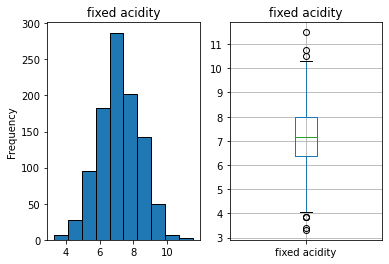

In [94]:
histAndBox("fixed acidity")

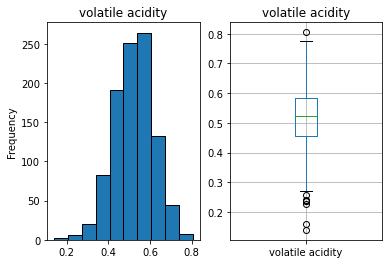

In [95]:
histAndBox("volatile acidity")

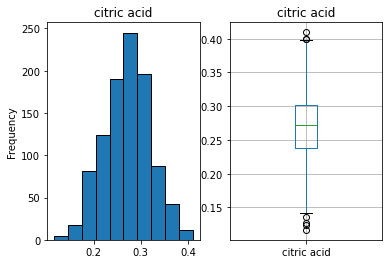

In [96]:
histAndBox("citric acid")

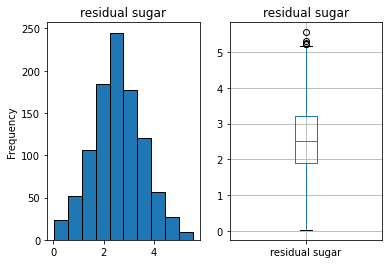

In [97]:
histAndBox("residual sugar")

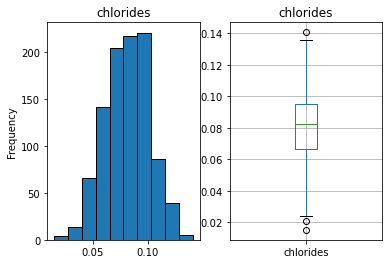

In [98]:
histAndBox("chlorides")

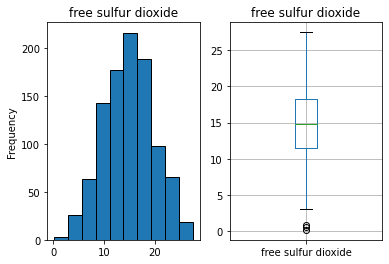

In [99]:
histAndBox("free sulfur dioxide")

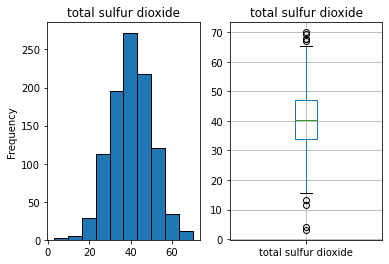

In [100]:
histAndBox("total sulfur dioxide")

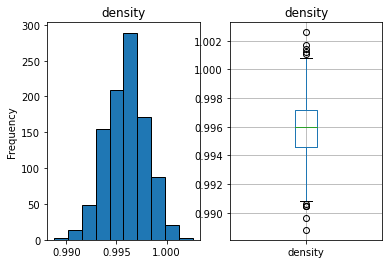

In [101]:
histAndBox("density")

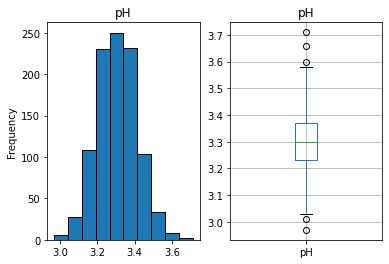

In [102]:
histAndBox("pH")

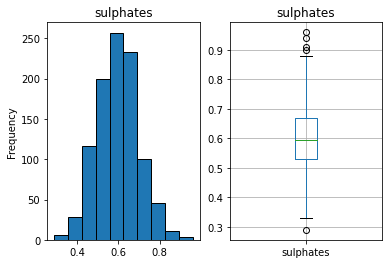

In [103]:
histAndBox("sulphates")

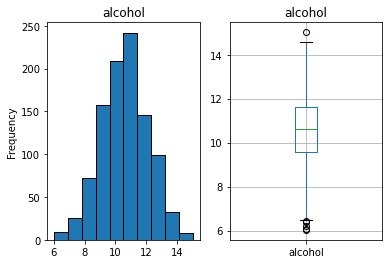

In [104]:
histAndBox("alcohol")

# Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

# fixed acidity

Normality test statistic: 0.14329615661430725
p-value: 0.9308584274486692
fixed acidity berdistribusi normal.


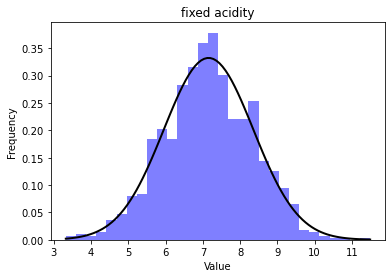

# volatile acidity

Normality test statistic: 7.581251985533493
p-value: 0.022581461594113835
volatile acidity tidak berdistribusi normal.


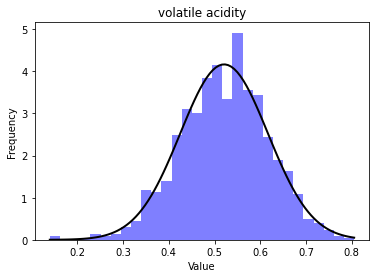

# citric acid

Normality test statistic: 0.7663607229418252
p-value: 0.6816899375976969
citric acid berdistribusi normal.


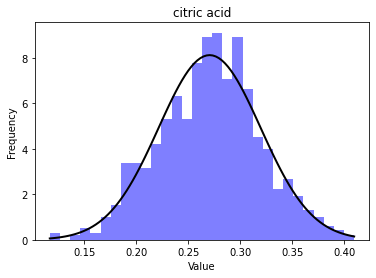

# residual sugar

Normality test statistic: 2.9862716504538622
p-value: 0.22466703321310558
residual sugar berdistribusi normal.


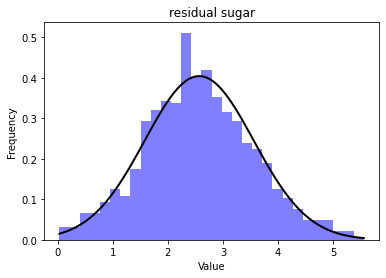

# chlorides

Normality test statistic: 3.538242355484952
p-value: 0.17048274704296862
chlorides berdistribusi normal.


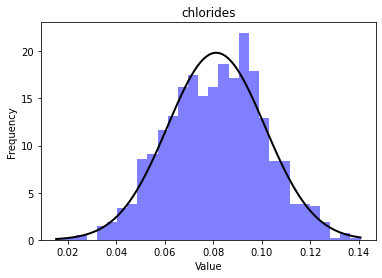

# free sulfur dioxide

Normality test statistic: 8.099074980855514
p-value: 0.01743043451827735
free sulfur dioxide tidak berdistribusi normal.


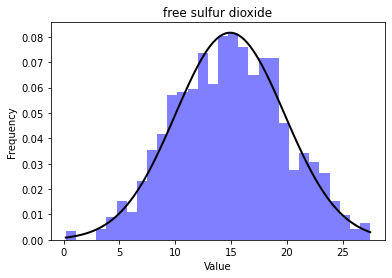

# total sulfur dioxide

Normality test statistic: 0.3276640291639825
p-value: 0.8488846101395726
total sulfur dioxide berdistribusi normal.


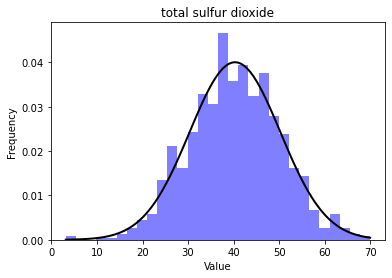

# density

Normality test statistic: 1.026581544320803
p-value: 0.5985227325531981
density berdistribusi normal.


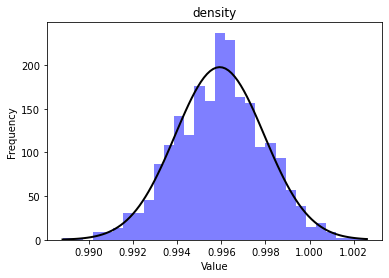

# pH

Normality test statistic: 3.9786546459928545
p-value: 0.13678740824860436
pH berdistribusi normal.


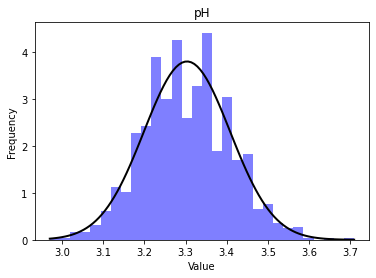

# sulphates

Normality test statistic: 3.948820277859041
p-value: 0.13884318628391681
sulphates berdistribusi normal.


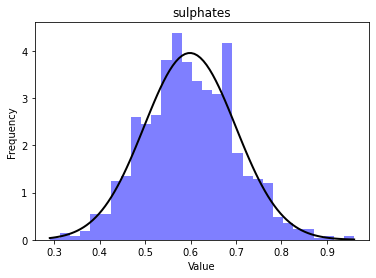

# alcohol

Normality test statistic: 0.7740076714171271
p-value: 0.6790884901361043
alcohol berdistribusi normal.


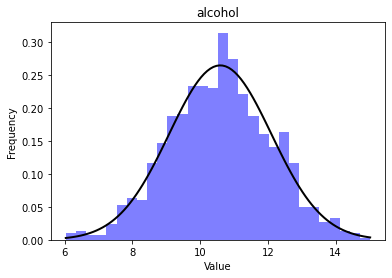

In [105]:
def normality_test(col):
    statistic, p_value = normaltest(df[col])
    data = df[col]

    display(Markdown(("# %s" %(col))))
    print('Normality test statistic:', statistic)
    print('p-value:', p_value)

    if p_value < 0.05:
        print(col, "tidak berdistribusi normal.")
    else:
        print(col, "berdistribusi normal.")

    plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

    mu, std = norm.fit(data) # mendapatkan mean dan standar deviasi
    x = np.linspace(min(data), max(data), 100)
    p = norm.pdf(x, mu, std) # Probability Densitiy Function
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(col)

    plt.show()
    print()
    
for col in target.columns:
    normality_test(col)

# Test Hipotesis 1 Sampel

## Nilai rata-rata pH di atas 3.29?

#### $H_{{0}}$ : Rata - rata pH = 3.29
#### $H_{{1}}$ : Rata - rata pH > 3.29

In [106]:
z, p = ztest(df["pH"], value = 3.29, alternative="larger")
zalpha = st.norm.ppf(1-0.05) #alpha 0.05

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z  > zalpha):
    display(Markdown(f"### **Menolak $H_0$** karena $z$ berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, **nilai rata - rata pH lebih dari 3.29**"))
else:
    display(Markdown(f"### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, **nilai rata - rata pH sama dengan 3.29**"))

### $Z_{value}$ : 4.103781

### $P$ : 0.000020

### **Menolak $H_0$** karena $z$ berada pada **critical region**

### Jadi, **nilai rata - rata pH lebih dari 3.29**

## Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

#### $H_{{0}}$ : Rata - rata Residual Sugar = 2.50
#### $H_{{1}}$ : Rata - rata Residual Sugar ${{\neq}}$ 2.50

In [107]:
mean = 2.50
alpha = 0.05

z, p = ztest(df["residual sugar"], value = mean, alternative="two-sided")
zalpha = st.norm.ppf(1- (alpha/2))

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $Z_{{\\alpha/2}}$ : %f" %(z))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z < -zalpha or z > zalpha):
    display(Markdown(f"### **Menolak $H_0$** karena $z$ berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, **nilai rata - rata Residual Sugar tidak sama dengan 2.50**"))
else:
    display(Markdown(f"### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, **nilai rata - rata Residual Sugar sama dengan 2.50**"))

### $Z_{value}$ : 2.147962

### $Z_{\alpha/2}$ : 2.147962

### $P$ : 0.031717

### **Menolak $H_0$** karena $z$ berada pada **critical region**

### Jadi, **nilai rata - rata Residual Sugar tidak sama dengan 2.50**

## Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

#### $H_{{0}}$ : Rata - rata 150 baris pertama kolom sulphates = 0.65
#### $H_{{1}}$ : Rata - rata 150 baris pertama kolom sulphates ${{\neq}}$ 0.65

In [108]:
mean = 0.65
alpha = 0.05

z, p = ztest(df["sulphates"].head(150), value = mean, alternative="two-sided")
zalpha = st.norm.ppf(1- (alpha/2))

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $Z_{{\\alpha/2}}$ : %f" %(zalpha))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z < -zalpha or z > zalpha):
    display(Markdown(f"### **Menolak $H_0$** karena $z$ berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, **nilai rata - rata Residual Sugar tidak sama dengan {mean}**"))
else:
    display(Markdown(f"### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, **nilai rata - rata Residual Sugar sama dengan {mean}**"))

### $Z_{value}$ : -4.964843

### $Z_{\alpha/2}$ : 1.959964

### $P$ : 0.000001

### **Menolak $H_0$** karena $z$ berada pada **critical region**

### Jadi, **nilai rata - rata Residual Sugar tidak sama dengan 0.65**

## Nilai rata-rata total sulfur dioxide di bawah 35?

#### $H_{{0}}$ : Rata - rata total sulfur dioxide  = 35
#### $H_{{1}}$ : Rata - rata total sulfur dioxide ${{\lt}}$ 35

In [109]:
mean = 35
alpha = 0.05

z, p = ztest(df["total sulfur dioxide"], value = mean, alternative="smaller")
zalpha = st.norm.ppf((alpha))

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $Z_{{\\alpha}}$ : %f" %(zalpha))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z < zalpha):
    display(Markdown(f"### **Menolak $H_0$** karena $z$ berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, **nilai rata - rata Total Sulfur Dioxide tidak sama dengan {mean}**"))
else:
    display(Markdown(f"### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, **nilai rata - rata Total Sulfur Dioxide sama dengan {mean}**"))

### $Z_{value}$ : 16.786387

### $Z_{\alpha}$ : -1.644854

### $P$ : 1.000000

### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**

### Jadi, **nilai rata - rata Total Sulfur Dioxide sama dengan 35**

## Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%

#### $H_{{0}}$ : Proporsi nilai total Sulfat Dioxide yang lebih dari 40 = 50%
#### $H_{{1}}$ : Proporsi nilai total Sulfat Dioxide yang lebih dari 40 ${{\neq}}$ 50%

In [110]:
p0 = 0.5
alpha = 0.05

z, p = proportions_ztest(len(df[df["total sulfur dioxide"] > 40]), len(df), value=p0, alternative="two-sided", prop_var=p0)
zalpha = st.norm.ppf(1- (alpha/2))

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $Z_{{\\alpha/2}}$ : %f" %(zalpha))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z < -zalpha or z > zalpha):
    display(Markdown(f"### **Menolak $H_0$** karena $z$ berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, **Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan {p0}**"))
else:
    display(Markdown(f"### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, **Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah sama dengan {p0}**"))

### $Z_{value}$ : 0.758947

### $Z_{\alpha/2}$ : 1.959964

### $P$ : 0.447884

### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**

### Jadi, **Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah sama dengan 0.5**

# Melakukan Test Hipotesis 2 Sampel

## Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

#### $H_{{0}}$ : Nilai rata - rata bagian awal dan bagian akhir fixed acidity tidak sama (${{\mu_1}}$ - ${{\mu_2}}$ = 0) 
#### $H_{{1}}$ : Nilai rata - rata bagian awal dan bagian akhir fixed acidity sama (${{\mu_1}}$ - ${{\mu_2}}$ ${{\neq}}$ 0)

In [137]:
deltaMiu = 0
alpha = 0.05

awal = df["fixed acidity"][:len(df) // 2] # Bagian awal
akhir = df["fixed acidity"][len(df) // 2:] # Bagian akhir
z, p = ztest(awal, akhir, value=deltaMiu, alternative="two-sided")

zalpha = st.norm.ppf(1- (alpha/2))

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $Z_{{\\alpha/2}}$ : %f" %(zalpha))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z < -zalpha or z > zalpha):
    display(Markdown(f"### **Menolak $H_0$** karena $z$ berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, **Data kolom fixed acidity jika dibagi 2 sama rata: bagian awal dan bagian akhir kolom, rata-rata kedua bagian tersebut sama**"))
else:
    display(Markdown(f"### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, **Data kolom fixed acidity jika dibagi 2 sama rata: bagian awal dan bagian akhir kolom, rata-rata kedua bagian tersebut tidak sama**"))

### $Z_{value}$ : 0.026041

### $Z_{\alpha/2}$ : 1.959964

### $P$ : 0.979225

### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**

### Jadi, **Data kolom fixed acidity jika dibagi 2 sama rata: bagian awal dan bagian akhir kolom, rata-rata kedua bagian tersebut tidak sama**

## Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

#### $H_{{0}}$ : Nilai rata - rata bagian awal tidak lebih besar daripada bagian akhir sebesar 0.001 (${{\mu_1}}$ - ${{\mu_2}}$ = 0.001) 
#### $H_{{1}}$ : Nilai rata - rata bagian awal lebih besar daripada bagian akhir sebesar 0.001 (${{\mu_1}}$ - ${{\mu_2}}$ ${{\neq}}$ 0.001)

In [112]:
deltaMiu = 0.001
alpha = 0.05


awal = df["chlorides"][:len(df) // 2] # Bagian awal
akhir = df["chlorides"][len(df) // 2:] # Bagian akhir
z, p = ztest(awal, akhir, value=deltaMiu, alternative='two-sided')

zalpha = st.norm.ppf(1-(alpha/2))

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $Z_{{\\alpha}}$ : %f" %(zalpha))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z < -zalpha) or (z > zalpha):
    display(Markdown(f"### **Menolak $H_0$** karena $z$ berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, **Data kolom chlorides jika dibagi 2 sama rata: bagian awal dan bagian akhir kolom, rata-rata bagian awal tidak lebih besar daripada bagian akhir sebesar 0.001**"))
else:
    display(Markdown(f"### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, **Data kolom chlorides jika dibagi 2 sama rata: bagian awal dan bagian akhir kolom, rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001**"))

### $Z_{value}$ : -0.467317

### $Z_{\alpha}$ : 1.959964

### $P$ : 0.640273

### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**

### Jadi, **Data kolom chlorides jika dibagi 2 sama rata: bagian awal dan bagian akhir kolom, rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001**

## Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

#### $H_{{0}}$ : rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphate (${{\mu_1}}$ - ${{\mu_2}}$ = 0) 
#### $H_{{1}}$ : Rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphate (${{\mu_1}}$ - ${{\mu_2}}$ ${{\neq}}$ 0)

In [113]:
deltaMiu = 0
alpha = 0.05

awal = df["volatile acidity"][:25] # Bagian awal
akhir = df["sulphates"][25:] # Bagian akhir
z, p = ztest(awal, akhir, value=deltaMiu, alternative="two-sided")

zalpha = st.norm.ppf(1- (alpha/2))

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $Z_{{\\alpha/2}}$ : %f" %(zalpha))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z < -zalpha or z > zalpha):
    display(Markdown(f"### **Menolak $H_0$** karena $z$ berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, **Rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates**"))
else:
    display(Markdown(f"### **Tidak menolak $H_0$** karena $z$ tidak berada pada **critical region**"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, **Rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates**"))

### $Z_{value}$ : -4.813169

### $Z_{\alpha/2}$ : 1.959964

### $P$ : 0.000001

### **Menolak $H_0$** karena $z$ berada pada **critical region**

### Jadi, **Rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates**

## Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

#### $H_{{0}}$ : Bagian awal kolom residual sugar tidak memiliki variansi yang sama dengan bagian akhirnya (${{\sigma^2_1}}$ = ${{\sigma^2_2}}$) 
#### $H_{{1}}$ : Bagian awal kolom residual sugar tidak memiliki variansi yang sama dengan bagian akhirnya (${{\sigma^2_1}}$ ${{\neq}}$ ${{\sigma^2_2}}$)

In [136]:
alpha = 0.05
var1 = len(df["volatile acidity"][:len(df) // 2]) - 1
var2 = len(df["volatile acidity"][len(df) // 2:]) - 1

f = df["volatile acidity"][:len(df) // 2].var() / df["volatile acidity"][len(df) // 2:].var() 
p = st.f.cdf(f, var1, var2)
# print(p)

display(Markdown((f"### $f_{{}}$ : %f" %(z))))
display(Markdown((f"### $P$ : %f" %(p))))

fUpper = st.f.ppf(1 - alpha / 2, var1, var2)
fLower = st.f.ppf(alpha / 2, var1, var2)

# print(fUpper)
# print(fLower)

display(Markdown(f"### $f_{{\\alpha / 2}} (v_1, v_2)$ = {fUpper}"))
display(Markdown(f"### $f_{{1 - \\alpha / 2}} (v_1, v_2)$ = {fLower}"))

if(f < -fLower or f > fUpper):
    display(Markdown(f"### Keputusan: Tolak $H_0$ dikarenakan $f$ berada pada *critical section* ($f < {fLower}$ atau $f > {fUpper}$)"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, variansi pada bagian awal kolom Sulfate tidak sama dengan variansi pada bagian akhir kolom Sulfate"))
else:
    display(Markdown(f"### Keputusan: Tidak menolak $H_0$ dikarenakan $f$ tidak berada pada *critical section* ($ {fLower} ≤ z ≤ {fUpper}$)"))
    display(Markdown(f"### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= {alpha}$)"))
    display(Markdown(f"### Jadi, variansi pada bagian awal kolom Sulfate sama dengan variansi pada bagian akhir kolom Sulfate"))

### $f_{}$ : 0.000000

### $P$ : 0.028711

### $f_{\alpha / 2} (v_1, v_2)$ = 1.1920574017201653

### $f_{1 - \alpha / 2} (v_1, v_2)$ = 0.8388857772763105

### Keputusan: Tidak menolak $H_0$ dikarenakan $f$ tidak berada pada *critical section* ($ 0.8388857772763105 ≤ z ≤ 1.1920574017201653$)

### Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p >= 0.05$)

### Jadi, variansi pada bagian awal kolom Sulfate sama dengan variansi pada bagian akhir kolom Sulfate

## Proporsi nilai setengah bagian awal alcohol yang lebih dari 7 adalah lebih besar daripada proporsi nilai yang sama di setengah bagian akhir alcohol?

#### $H_{{0}}$ : Proporsi nilai setengah bagian awal alcohol yang lebih dari 7 tidak lebih besar daripada proporsi nilai yang sama di setengah bagian akhir alcohol (${{p_1}}$ - ${{p_2}}$ = 0)
#### $H_{{1}}$ : Proporsi nilai setengah bagian awal alcohol yang lebih dari 7 lebih besar daripada proporsi nilai yang sama di setengah bagian akhir alcohol (${{p_1}}$ - ${{p_2}}$ > 0)

In [135]:
deltaP = 0
alpha = 0.05

awal = df["alcohol"][:len(df) // 2]
akhir = df["alcohol"][len(df) // 2:]

z, p = proportions_ztest([len(awal[awal > 7]), len(akhir[akhir > 7])], [len(awal), len(akhir)], value=deltaP, alternative="larger")
zalpha = st.norm.ppf(1 - alpha)

display(Markdown((f"### $Z_{{value}}$ : %f" %(z))))
display(Markdown((f"### $Z_{{\\alpha}}$ : %f" %(zalpha))))
display(Markdown((f"### $P$ : %f" %(p))))

if(z  > zalpha):
    display(Markdown(f"### Keputusan: Tolak $H_0$ dikarenakan $z$ berada pada *critical section* ($z > {zalpha}$)"))
    display(Markdown(f"### Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"### Jadi, proporsi nilai bagian awal Turbidity yang lebih dari 7 lebih besar dengan proporsi nilai yang sama pada di bagian akhir Turbidity"))
else:
    display(Markdown(f"### Keputusan: Tidak menolak $H_0$ dikarenakan $z$ tidak berada pada *critical section* ($z <= {zalpha}$)"))
    display(Markdown(f"### Tes Signifikans: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ {alpha}$)"))
    display(Markdown(f"### Jadi, proporsi nilai bagian awal Turbidity yang lebih dari 7 sama besar dengan proporsi nilai yang sama pada di bagian akhir Turbidity ($p_{{1}} - p_{{2}} = {deltaP}$)"))

### $Z_{value}$ : 0.000000

### $Z_{\alpha}$ : 1.644854

### $P$ : 0.500000

### Keputusan: Tidak menolak $H_0$ dikarenakan $z$ tidak berada pada *critical section* ($z <= 1.6448536269514722$)

### Tes Signifikans: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ 0.05$)

### Jadi, proporsi nilai bagian awal Turbidity yang lebih dari 7 sama besar dengan proporsi nilai yang sama pada di bagian akhir Turbidity ($p_{1} - p_{2} = 0$)